<a href="https://colab.research.google.com/github/Kushagratandon12/Weed_Detection/blob/main/WEED_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##IMPORTANT IMPORT'S REQUIRED FOR THE CODE
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# INSTALLING THE DATASET- DEEP WEEDX


In [2]:
!pip install kaggle
# # from google.colab import files
# # files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d coreylammie/deepweedsx

 98% 929M/943M [00:16<00:00, 27.1MB/s]
100% 943M/943M [00:16<00:00, 59.5MB/s]


In [3]:
import zipfile
local_zip = '/content/deepweedsx.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

# UNDERSTANDING THE DATASET

In [4]:
train_df = pd.read_csv('/content/train_set_labels.csv', delimiter=',')
train_df.head()

,Label,Species
0,20161207-111327-0.jpg,0
1,20170718-095159-2.jpg,0
2,20170811-133439-1.jpg,0
3,20170811-133752-1.jpg,0
4,20170217-114015-0.jpg,0


0- Chinee Apple
1- Lantana
2- Parkinsonia
3- Parthenium
4- Prickly Acacia
5- Rubber Vine
6- Siam Weed
7- Snake Weed
8- Other

In [5]:
train_df['Species_Name'] = train_df['Species'].map({0:'Chinee Apple',1:'Lantana',2:'Parkinsonia',3:'Parthenium',4:'Prickly Acacia',5:'Rubber Vine',6:'Siam Weed',7:'Snake Weed',8:'Other'})

In [6]:
#Total Number Of Species We Have In Our Dataset
train_df.groupby(['Species']).count()

,Label,Species_Name
Species,,
0,964,964
1,912,912
2,884,884
3,876,876
4,910,910
5,865,865
6,921,921
7,871,871
8,7804,7804


# Analyzing The Images In The Dataset For Different Species

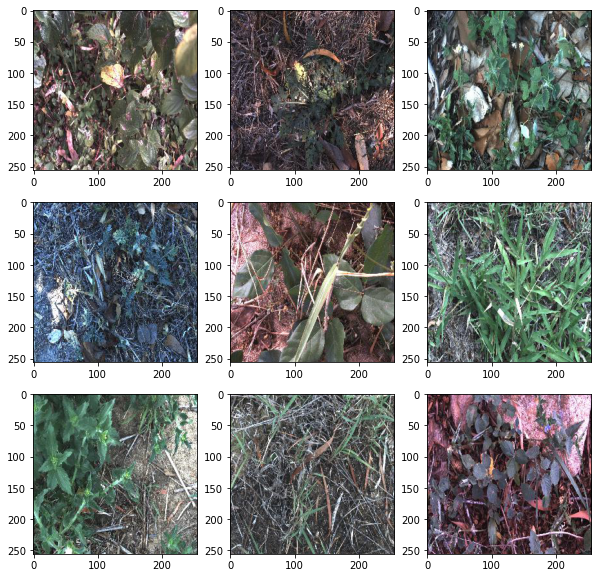

In [7]:
file_name = train_df['Label']
file_name = shuffle(file_name)
file_name = file_name.reset_index()
plt.figure(figsize=(10,10))
for i in range(0, 9):
    plt.subplot(3,3,i+1)
    img = plt.imread('/content/DeepWeeds_Images_256/'+file_name['Label'][i])
    plt.imshow(img/255,aspect='auto')

# **SHOWING WHAT IMAGE AGUMENTATION DO*

In [8]:
# # Importing necessary functions 
# from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img 
   
# # Initialising the ImageDataGenerator class. 
# # We will pass in the augmentation parameters in the constructor. 
# datagen = ImageDataGenerator( 
#         rescale=1./255,
#         rotation_range = 30, 
#         shear_range = 0.2, 
#         zoom_range = 0.2,
#         brightness_range=[1.5,1.9],
#         horizontal_flip = True,) 

# # Loading a sample image  
# img = load_img('/content/DeepWeeds_Images_256/20161207-110730-0.jpg')  
# # Converting the input sample image to an array 
# x = img_to_array(img) 
# # Reshaping the input image 
# x = x.reshape((1, ) + x.shape)  
   
# # Generating and saving 7 augmented samples  
# # using the above defined parameters.  
# i = 0
# for batch in datagen.flow(x, batch_size = 1, 
#                           save_to_dir ='/content/',  
#                           save_prefix ='image', save_format ='jpeg'): 
#     i += 1
#     if i > 5: 
#         break

In [9]:
# ! zip result.zip *.jpeg

In [10]:
# rm -rf *.jpeg

# Agumentation USING IMAGE DATA GENERTAOR OF TENSORFLOW 

In [11]:
train_gen= ImageDataGenerator(rescale=1./255,
                                 rotation_range=20,
                                 zoom_range=0.5,
                                 brightness_range=[1.5,1.9],
                                 width_shift_range=0.1,
                                 height_shift_range=0.1)

train_generator=train_gen.flow_from_dataframe( 
                                            dataframe=train_df,
                                            directory="/content/DeepWeeds_Images_256",
                                            x_col="Label",
                                            y_col="Species_Name",
                                            batch_size=32,
                                            seed=42,
                                            shuffle=True,
                                            class_mode='categorical',
                                            target_size=(160,160)
                                            )

Found 15007 validated image filenames belonging to 9 classes.


In [12]:
CLASS_NAMES = ['Chinee Apple',
'Lantana',
'Parkinsonia',
'Parthenium',
'Prickly Acacia',
'Rubber Vine',
'Siam Weed',
'Snake Weed',
'Other']

print(len(CLASS_NAMES))

9


**Validation / Testing Dataset Extraction**

In [13]:
test_df = pd.read_csv('/content/train_set_labels.csv')
test_df['Species_Name'] = test_df['Species'].map({0:'Chinee Apple',1:'Lantana',2:'Parkinsonia',3:'Parthenium',4:'Prickly Acacia',5:'Rubber Vine',6:'Siam Weed',7:'Snake Weed',8:'Other'})

(256, 256, 3)


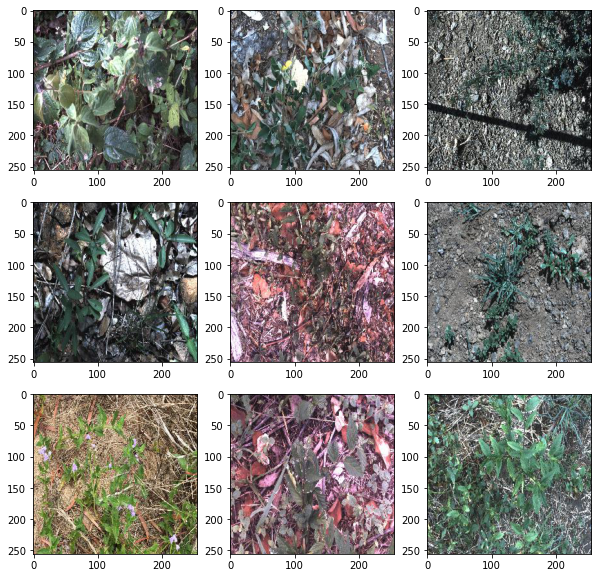

In [14]:
file_name = test_df['Label']
file_name = shuffle(file_name)
file_name = file_name.reset_index()
plt.figure(figsize=(10,10))
for i in range(0, 9):
    plt.subplot(3,3,i+1)
    img = plt.imread('/content/DeepWeeds_Images_256/'+file_name['Label'][i])
    plt.imshow(img/255,aspect='auto')

print(img.shape)

Image Data Generator For Validation Dataset

In [15]:
validation_gen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_gen.flow_from_dataframe(
                                            dataframe=test_df,
                                            directory="/content/deepweeds_images_256",
                                            x_col="Label",
                                            y_col="Species_Name",
                                            batch_size=32,
                                            seed=42,
                                            shuffle=True,
                                            class_mode='categorical',
                                            target_size=(160,160))

Found 15007 validated image filenames belonging to 9 classes.


# Model Building 

In [16]:
#Balancing the Class Weights Of All The Classes Since They Are Inbalanced 
from sklearn.utils import compute_class_weight
classweights = compute_class_weight('balanced',np.unique(train_generator.labels),train_generator.labels) 
Classweight= {}
for i,weight in enumerate(classweights):
    Classweight[i]=weight
print(Classweight)
#Changing the optimizer 
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

{0: 1.729714153988013, 1: 1.8283382066276803, 2: 0.21366535679708412, 3: 1.8862493715434892, 4: 1.9034753932014206, 5: 1.8323565323565323, 6: 1.9276814386640977, 7: 1.8104717094945109, 8: 1.9144023472381682}


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,MaxPooling2D
from tensorflow import keras
from tensorflow.keras.applications import ResNet50V2,InceptionV3,MobileNetV2
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping
import os

**Function For Transfer Learning Model **

In [19]:
IMG_HEIGHT = 160
IMG_WIDTH = 160
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)
def define_model(n_layers=150,BASE_MODEL='ResNet50V2'):
    if BASE_MODEL =='ResNet50V2':
        # Pre-trained model with MobileNetV2
        base_model = ResNet50V2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
        head_model = base_model
        for layers in base_model.layers[:n_layers]:
            layers.trainable=True
        head_model = head_model.output
        head_model = tf.keras.layers.GlobalMaxPooling2D()(head_model)
        head_model = tf.keras.layers.Flatten(name="Flatten")(head_model)
        head_model = tf.keras.layers.Dense(1024,activation='relu')(head_model)
        head_model = tf.keras.layers.Dropout(0.2)(head_model)
        prediction_layer = tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')(head_model)
        model = tf.keras.Model(inputs=base_model.input,outputs=prediction_layer)
    
    if BASE_MODEL =='InceptionV3':
        base_model = InceptionV3(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
        head_model = base_model
        for layers in base_model.layers[:n_layers]:
            layers.trainable=False
        
        head_model = head_model.output
        head_model = tf.keras.layers.GlobalMaxPooling2D()(head_model)
        head_model = tf.keras.layers.Flatten(name="Flatten")(head_model)
        head_model = tf.keras.layers.Dense(1024,activation='relu')(head_model)
        head_model = tf.keras.layers.Dropout(0.5)(head_model)
        prediction_layer = tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')(head_model)
        model = tf.keras.Model(inputs=base_model.input,outputs=prediction_layer)


    if BASE_MODEL =='MobileNetV2':
        base_model = MobileNetV2(input_shape=(160,160,3),include_top=False,weights='imagenet')
        head_model = base_model
        for layers in base_model.layers[:n_layers]:
            layers.trainable=True
        head_model = head_model.output
        head_model = tf.keras.layers.GlobalMaxPooling2D()(head_model)
        head_model = tf.keras.layers.Flatten(name="Flatten")(head_model)
        head_model = tf.keras.layers.Dense(1024,activation='relu')(head_model)
        head_model = tf.keras.layers.Dropout(0.5)(head_model)
        prediction_layer = tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')(head_model)
        model = tf.keras.Model(inputs=base_model.input,outputs=prediction_layer)    
    return model

# define Model 
model= define_model(BASE_MODEL='ResNet50V2')

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer=SGD(lr=0.01), 
    metrics=['accuracy'])

94674944/94668760 [==============================] - 2s 0us/step


In [20]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 166, 166, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 80, 80, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 82, 82, 64)   0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [21]:
#mcp_save = ModelCheckpoint('weed_weights', save_best_only=True, monitor='val_accuracy', mode='max')
reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')

In [22]:
epochs=50
steps_per_epoc = 160
checkpoint= tf.keras.callbacks.ModelCheckpoint(filepath='Model_Weights_ResNet50',monitor='val_accuracy', verbose= 1 ,save_best_only=True,)
callbacks_list = [checkpoint,reduce_lr_loss]
history=model.fit(train_generator,epochs=epochs,
                  steps_per_epoch = steps_per_epoc,
                  validation_data=validation_generator,
                  callbacks=callbacks_list)

Epoch 1/50
160/160 [==============================] - 86s 472ms/step - loss: 3.7689 - accuracy: 0.4597 - val_loss: 1.9590 - val_accuracy: 0.5086

Epoch 00001: val_accuracy improved from -inf to 0.50856, saving model to Model_Weights_ResNet50
INFO:tensorflow:Assets written to: Model_Weights_ResNet50/assets
Epoch 2/50
160/160 [==============================] - 74s 462ms/step - loss: 1.5650 - accuracy: 0.5076 - val_loss: 1.3934 - val_accuracy: 0.5220

Epoch 00002: val_accuracy improved from 0.50856 to 0.52196, saving model to Model_Weights_ResNet50
INFO:tensorflow:Assets written to: Model_Weights_ResNet50/assets
Epoch 3/50
160/160 [==============================] - 74s 463ms/step - loss: 1.3632 - accuracy: 0.5269 - val_loss: 1.4099 - val_accuracy: 0.4667

Epoch 00003: val_accuracy did not improve from 0.52196
Epoch 4/50
160/160 [==============================] - 74s 464ms/step - loss: 1.2290 - accuracy: 0.5605 - val_loss: 1.1631 - val_accuracy: 0.5762

Epoch 00004: val_accuracy improved f

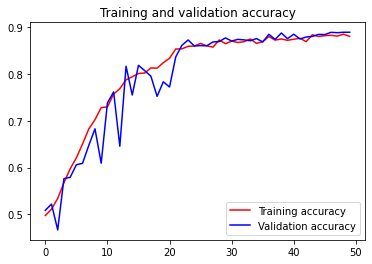

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [24]:
converter = tf.lite.TFLiteConverter.from_saved_model('/content/Model_Weights_ResNet50') # path to the SavedModel directory
tflite_model = converter.convert()

with open('tflite_model','wb') as file:
  file.write(tflite_model)

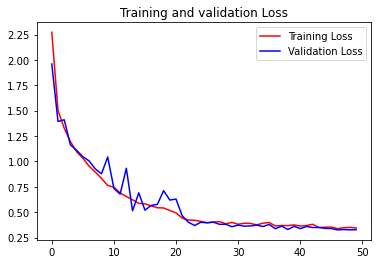

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()